In [5]:
import pandas as pd

preprocessed_climate_data = pd.read_csv('preprocessed_climate_data.csv')

# Display information
print(preprocessed_climate_data.head())
print(preprocessed_climate_data.info())
print(preprocessed_climate_data.describe())

         time  TREFMXAV_U      FLNS      FSNS     PRECT          PRSN  \
0  2006-01-02    0.232391  0.371393  0.075178  0.006015  2.050094e-10   
1  2006-01-03    0.278081  0.074563  0.026442  0.103787  5.556072e-10   
2  2006-01-04    0.273144  0.142934  0.011669  0.003755  1.755699e-09   
3  2006-01-05    0.214745  0.263727  0.021133  0.000096  0.000000e+00   
4  2006-01-06    0.181589  0.165882  0.016664  0.000009  0.000000e+00   

       QBOT    TREFHT      UBOT      VBOT        lat    lon  year  month  
0  0.217948  0.298555  0.681783  0.514916  53.246075  357.5  2006      1  
1  0.330316  0.357238  0.577123  0.635272  53.246075  357.5  2006      1  
2  0.293747  0.359437  0.527892  0.331802  53.246075  357.5  2006      1  
3  0.181172  0.276752  0.432510  0.383420  53.246075  357.5  2006      1  
4  0.159701  0.266983  0.452234  0.399266  53.246075  357.5  2006      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27374 entries, 0 to 27373
Data columns (total 14 columns):
 #

#### Part 4 - Analysis

##### 4A. Further EDA

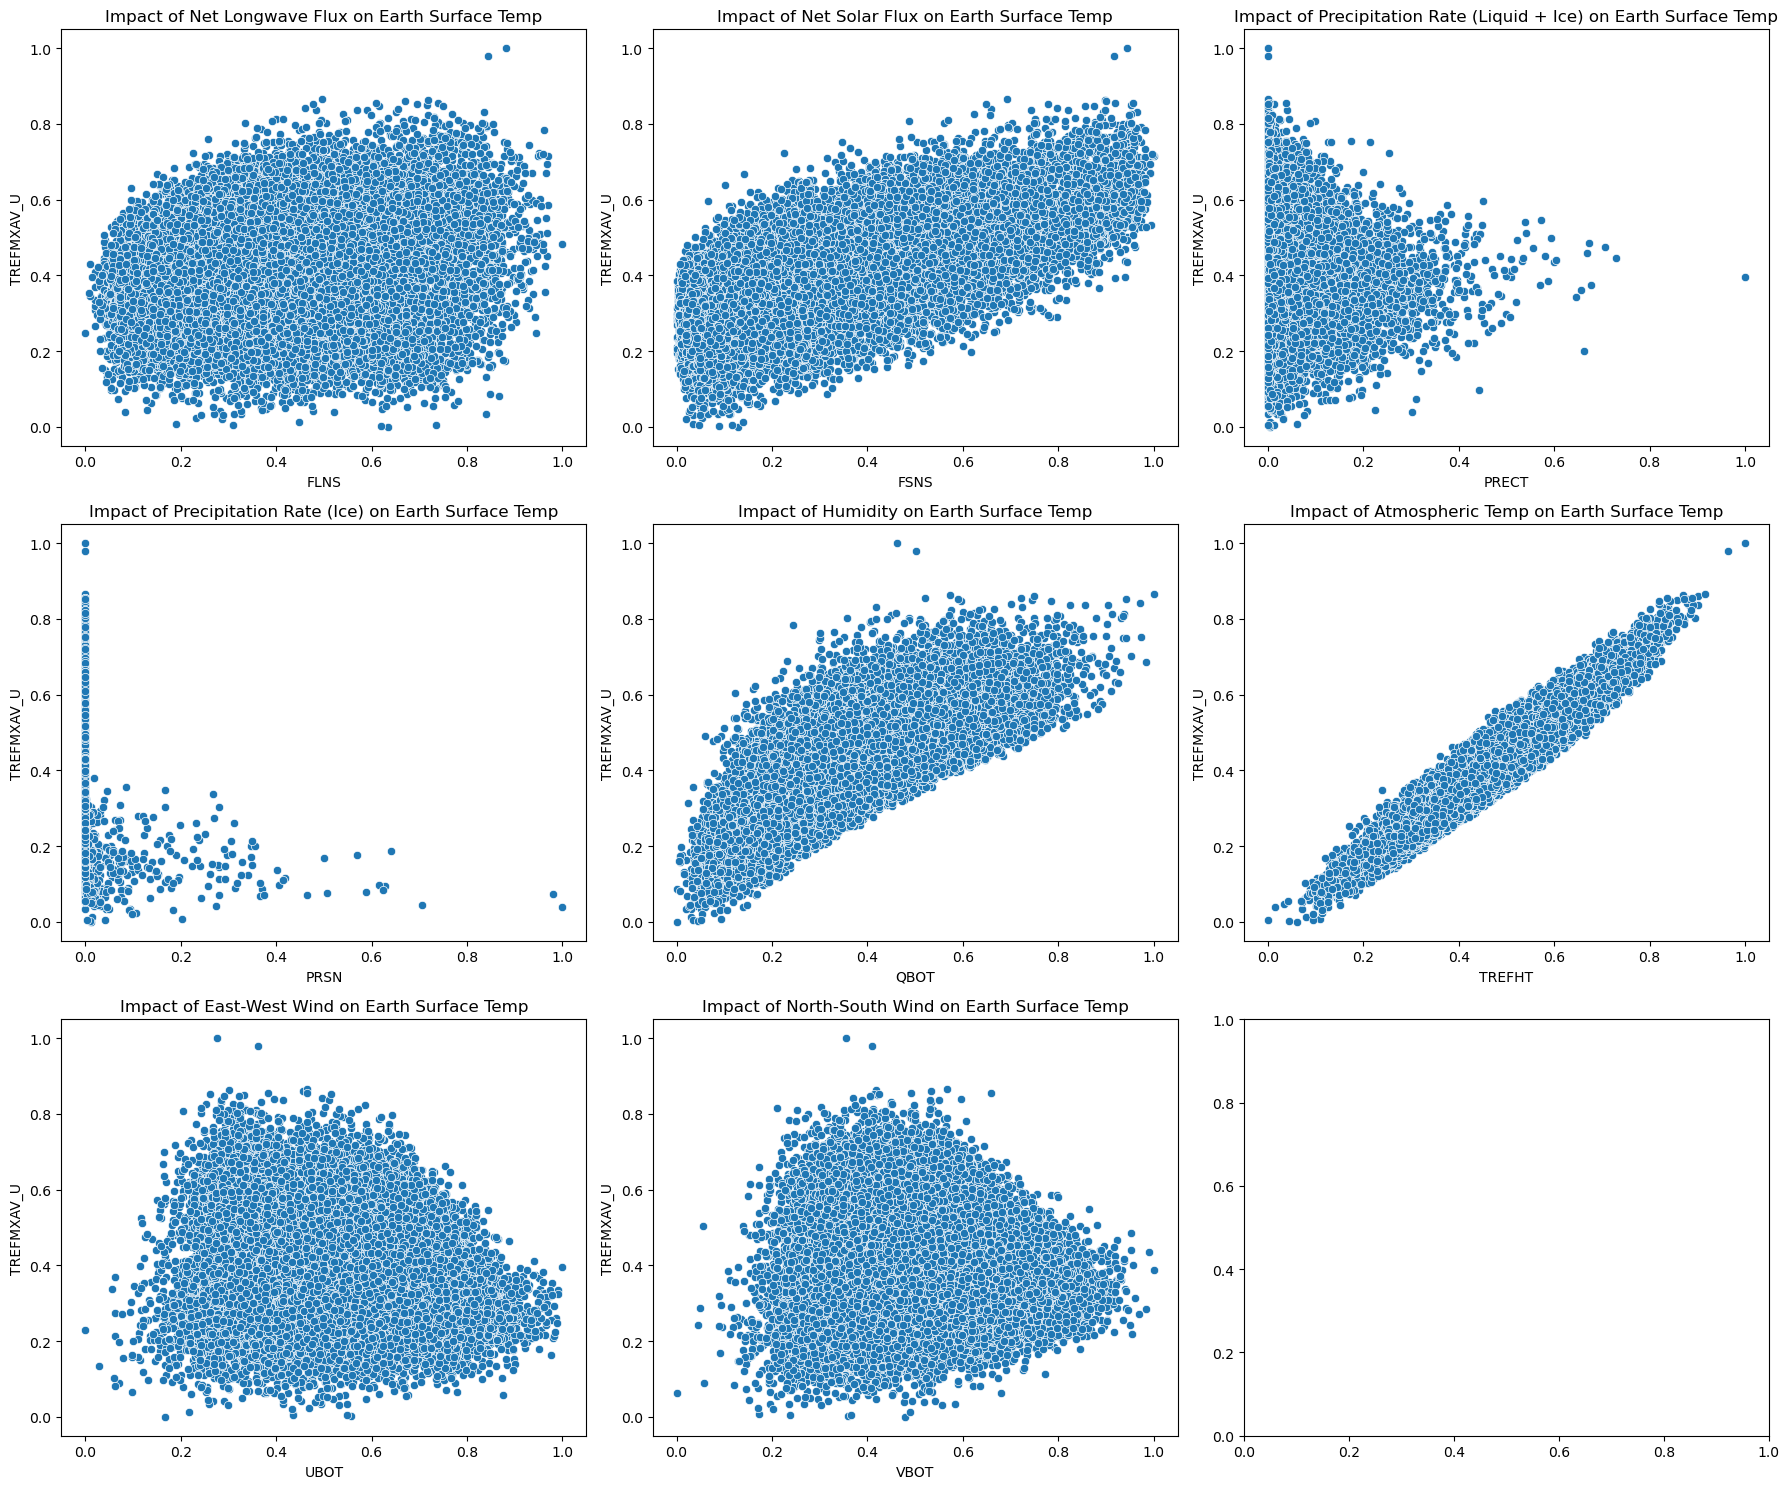

In [13]:
# Impacts of Each Variable towards Avg Earth's Surface Temp (TREFMXAV_U)

import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots: 3 rows, 3 columns (for up to 9 plots)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))  # Adjust figsize as needed

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot 1: TREFMXAV_U vs FLNS
sns.scatterplot(ax=axes[0], x=preprocessed_climate_data['FLNS'], y=preprocessed_climate_data['TREFMXAV_U'])
axes[0].set_title('Impact of Net Longwave Flux on Earth Surface Temp')
axes[0].set_xlabel('FLNS')
axes[0].set_ylabel('TREFMXAV_U')

# Plot 2: TREFMXAV_U vs FSNS
sns.scatterplot(ax=axes[1], x=preprocessed_climate_data['FSNS'], y=preprocessed_climate_data['TREFMXAV_U'])
axes[1].set_title('Impact of Net Solar Flux on Earth Surface Temp')
axes[1].set_xlabel('FSNS')
axes[1].set_ylabel('TREFMXAV_U')

# Plot 3: TREFMXAV_U vs PRECT
sns.scatterplot(ax=axes[2], x=preprocessed_climate_data['PRECT'], y=preprocessed_climate_data['TREFMXAV_U'])
axes[2].set_title('Impact of Precipitation Rate (Liquid + Ice) on Earth Surface Temp')
axes[2].set_xlabel('PRECT')
axes[2].set_ylabel('TREFMXAV_U')

# Plot 4: TREFMXAV_U vs PRSN
sns.scatterplot(ax=axes[3], x=preprocessed_climate_data['PRSN'], y=preprocessed_climate_data['TREFMXAV_U'])
axes[3].set_title('Impact of Precipitation Rate (Ice) on Earth Surface Temp')
axes[3].set_xlabel('PRSN')
axes[3].set_ylabel('TREFMXAV_U')

# Plot 5: TREFMXAV_U vs QBOT
sns.scatterplot(ax=axes[4], x=preprocessed_climate_data['QBOT'], y=preprocessed_climate_data['TREFMXAV_U'])
axes[4].set_title('Impact of Humidity on Earth Surface Temp')
axes[4].set_xlabel('QBOT')
axes[4].set_ylabel('TREFMXAV_U')

# Plot 6: TREFMXAV_U vs TREFHT
sns.scatterplot(ax=axes[5], x=preprocessed_climate_data['TREFHT'], y=preprocessed_climate_data['TREFMXAV_U'])
axes[5].set_title('Impact of Atmospheric Temp on Earth Surface Temp')
axes[5].set_xlabel('TREFHT')
axes[5].set_ylabel('TREFMXAV_U')

# Plot 7: TREFMXAV_U vs UBOT
sns.scatterplot(ax=axes[6], x=preprocessed_climate_data['UBOT'], y=preprocessed_climate_data['TREFMXAV_U'])
axes[6].set_title('Impact of East-West Wind on Earth Surface Temp')
axes[6].set_xlabel('UBOT')
axes[6].set_ylabel('TREFMXAV_U')

# Plot 8: TREFMXAV_U vs VBOT
sns.scatterplot(ax=axes[7], x=preprocessed_climate_data['VBOT'], y=preprocessed_climate_data['TREFMXAV_U'])
axes[7].set_title('Impact of North-South Wind on Earth Surface Temp')
axes[7].set_xlabel('VBOT')
axes[7].set_ylabel('TREFMXAV_U')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the combined plots
plt.show()

##### 4B. Correlation Matrix

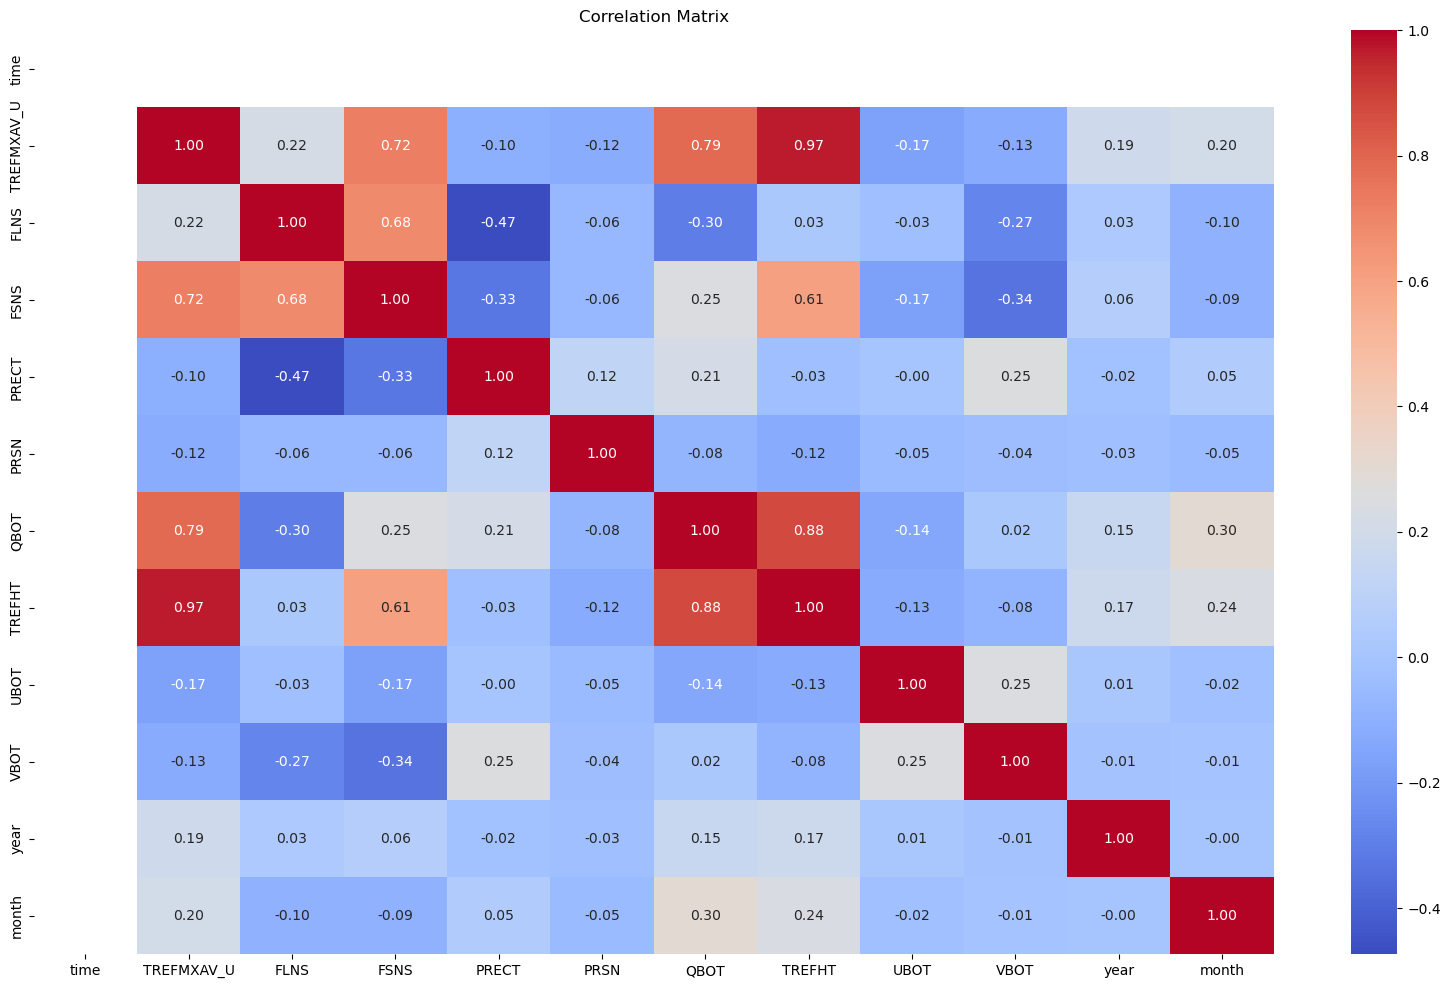

In [35]:
# Change datatype to datetime
preprocessed_climate_data['time'] = pd.to_datetime(preprocessed_climate_data['time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# List of columns to exclude
excluded_columns = ['lat', 'lon']

# Select only the columns that are not in the excluded list
filtered_data = preprocessed_climate_data.drop(columns=excluded_columns)

# Compute correlation matrix on the filtered data
correlation_matrix = filtered_data.corr()

# Visualize correlation heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

##### 4C. Feature Importance

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [23]:
# Step 1: Drop irrelevant features
X = preprocessed_climate_data.drop(columns= ['time', 'TREFMXAV_U', 'lat', 'lon', 'year', 'month'])

# Target variable: 'TREFMXAV_U'
y = preprocessed_climate_data['TREFMXAV_U']

In [25]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Step 3: Train Random Forest Regressor
gb = GradientBoostingRegressor(random_state=42, max_depth=5, n_estimators=500, learning_rate=0.01)
gb.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=500,
                          random_state=42)

In [29]:
# Step 4: Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,  
    'Importance': gb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display results
print("Key factors affecting Earth Surface Temp")
print(feature_importance)

Key factors affecting Earth Surface Temp
  Feature  Importance
5  TREFHT    0.951687
0    FLNS    0.035242
1    FSNS    0.004378
6    UBOT    0.002988
2   PRECT    0.002163
4    QBOT    0.001576
7    VBOT    0.001188
3    PRSN    0.000777
